In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/transformer-preprocessed-dataset/File5.csv


In [3]:
import pandas as pd
from statsmodels.tsa.vector_ar.var_model import VAR


In [4]:
data=pd.read_csv("/kaggle/input/transformer-preprocessed-dataset/File5.csv")
data



,Date_Time,Sid,Did,Station_Pair,Year,Month,Is_Holiday,Holiday_Type,OneHourSlot,Weekday,Passenger_Count
0,2018-06-01 00:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,1,4,0.0
1,2018-06-01 01:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,2,4,0.0
2,2018-06-01 02:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,3,4,0.0
3,2018-06-01 03:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,4,4,0.0
4,2018-06-01 04:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,5,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1755211,2024-04-20 19:00:00,12.0,8.0,Voltas Gate-Thane Station West,2024,4,0,0,20,5,0.0
1755212,2024-04-20 20:00:00,12.0,8.0,Voltas Gate-Thane Station West,2024,4,0,0,21,5,0.0
1755213,2024-04-20 21:00:00,12.0,8.0,Voltas Gate-Thane Station West,2024,4,0,0,22,5,0.0
1755214,2024-04-20 22:00:00,12.0,8.0,Voltas Gate-Thane Station West,2024,4,0,0,23,5,0.0


In [5]:
data.isnull().sum()

Date_Time          0
Sid                0
Did                0
Station_Pair       0
Year               0
Month              0
Is_Holiday         0
Holiday_Type       0
OneHourSlot        0
Weekday            0
Passenger_Count    0
dtype: int64

In [6]:
data["Date_Time"]=pd.to_datetime(data["Date_Time"])
data.head()

,Date_Time,Sid,Did,Station_Pair,Year,Month,Is_Holiday,Holiday_Type,OneHourSlot,Weekday,Passenger_Count
0,2018-06-01 00:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,1,4,0.0
1,2018-06-01 01:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,2,4,0.0
2,2018-06-01 02:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,3,4,0.0
3,2018-06-01 03:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,4,4,0.0
4,2018-06-01 04:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,5,4,0.0


In [7]:
data=data.set_index('Date_Time')

In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
# peform augmented dickey fuller test (ADF-Test) for stationarity 
#result =adfuller(data['Passenger_Count'])
#print('ADF Statistics: %f' %result[0])
#print('p-value: %f' %result[1])


In [11]:
station_pair_counts=data.groupby('Station_Pair')['Passenger_Count'].sum().reset_index()
total_passenger_counts=station_pair_counts['Passenger_Count'].sum()

#percentage contribution of each station pair
station_pair_counts['Percentage']=station_pair_counts['Passenger_Count']/total_passenger_counts * 100

# sort in descending order based on percentage
station_pair_distribution=station_pair_counts.sort_values('Percentage', ascending=False)

station_pair_distribution

,Station_Pair,Passenger_Count,Percentage
26,Thane Station West-Pawar Nagar,11058191.0,48.414227
28,Thane Station West-Voltas Gate,7339195.0,32.131969
4,Civil/Court-Pawar Nagar,2348063.0,10.280131
25,Thane Station West-Civil/Court,666411.0,2.917636
6,Civil/Court-Voltas Gate,614491.0,2.690323
22,Pawar Nagar-Thane Station West,340180.0,1.489353
32,Voltas Gate-Pawar Nagar,218123.0,0.954971
33,Voltas Gate-Thane Station West,187369.0,0.820326
17,Pawar Nagar-Civil/Court,44570.0,0.195133
5,Civil/Court-Thane Station West,8987.0,0.039346


target encoding because i feel there is a strong relationship between the station pair (categorical column) and passenger count (target variable)

In [12]:
from category_encoders import TargetEncoder

In [14]:
data=data.copy()

encoder=TargetEncoder()

data['Station_Pair_Encoded']=encoder.fit_transform(data['Station_Pair'], data['Passenger_Count'])

data.head()

,Sid,Did,Station_Pair,Year,Month,Is_Holiday,Holiday_Type,OneHourSlot,Weekday,Passenger_Count,Station_Pair_Encoded
Date_Time,,,,,,,,,,,
2018-06-01 00:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,1,4,0.0,0.000019
2018-06-01 01:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,2,4,0.0,0.000019
2018-06-01 02:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,3,4,0.0,0.000019
2018-06-01 03:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,4,4,0.0,0.000019
2018-06-01 04:00:00,10.0,8.0,Aazadnagar-Thane Station West,2018,6,0,0,5,4,0.0,0.000019


In [23]:
data['Station_Pair_Encoded'].nunique()

27

In [24]:
tgt_var=data['Passenger_Count']

In [27]:
!pip install statsmodels

In [28]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [34]:
data=data[['Passenger_Count','Station_Pair_Encoded']]

In [35]:
model = VAR(data)
results = model.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [36]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 29, Jun, 2024
Time:                     10:59:54
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    3.32186
Nobs:                 1.75522e+06    HQIC:                   3.32183
Log likelihood:      -7.89633e+06    FPE:                    27.7108
AIC:                      3.32182    Det(Omega_mle):         27.7107
--------------------------------------------------------------------
Results for equation Passenger_Count
                             coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------
const                           0.000000         0.015168            0.000           1.000
L1.Passenger_Count              0.862506         0.000382         2258.061           0.000
L1.Station

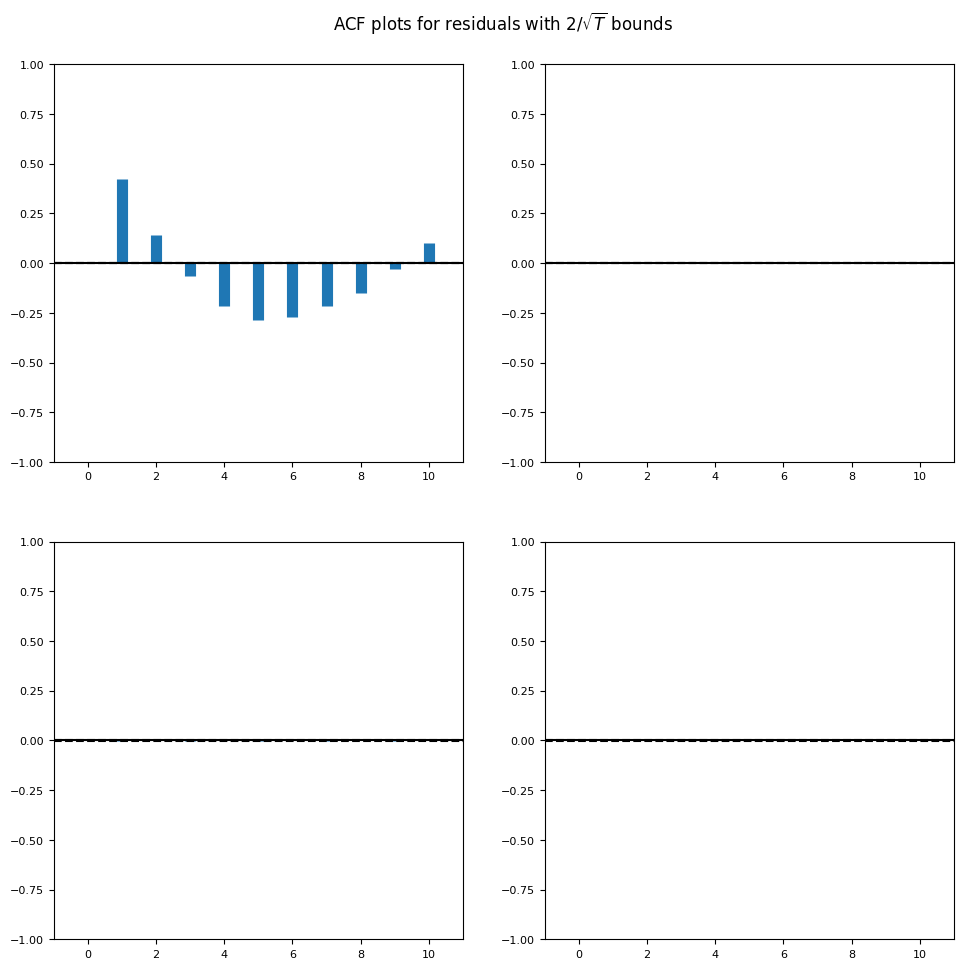

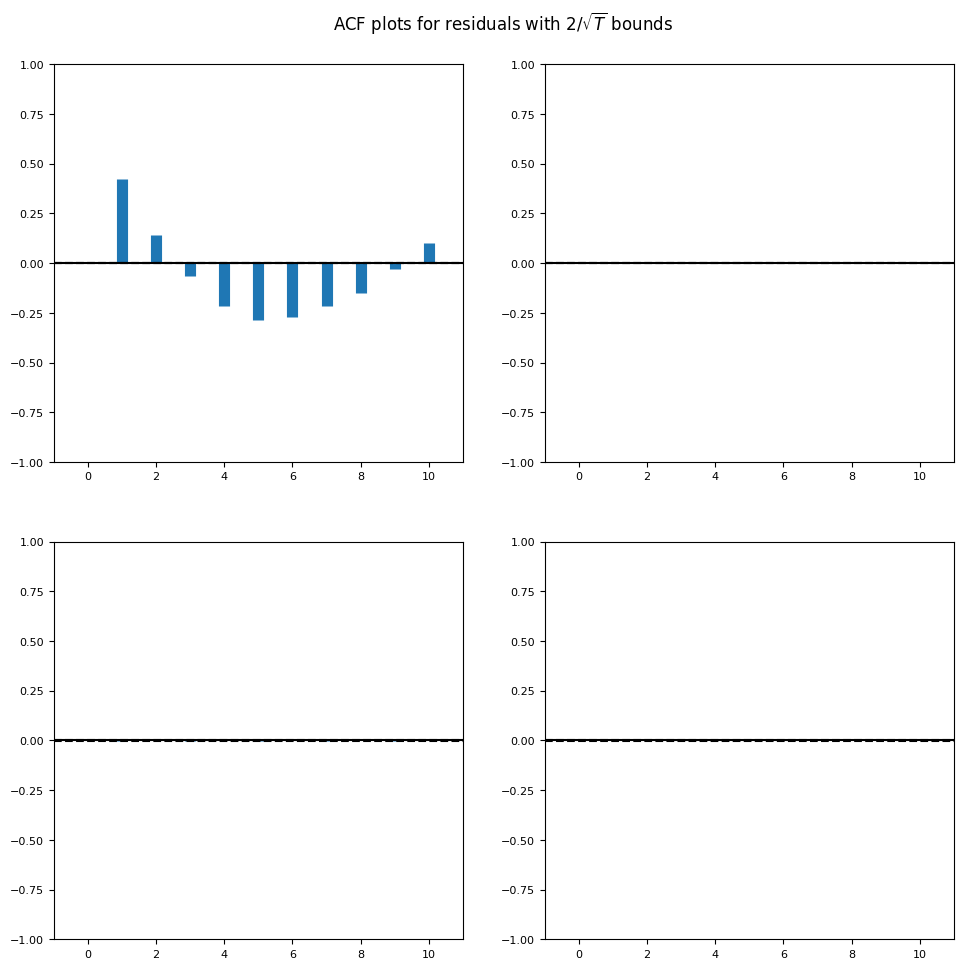

In [37]:
results.plot_acorr()

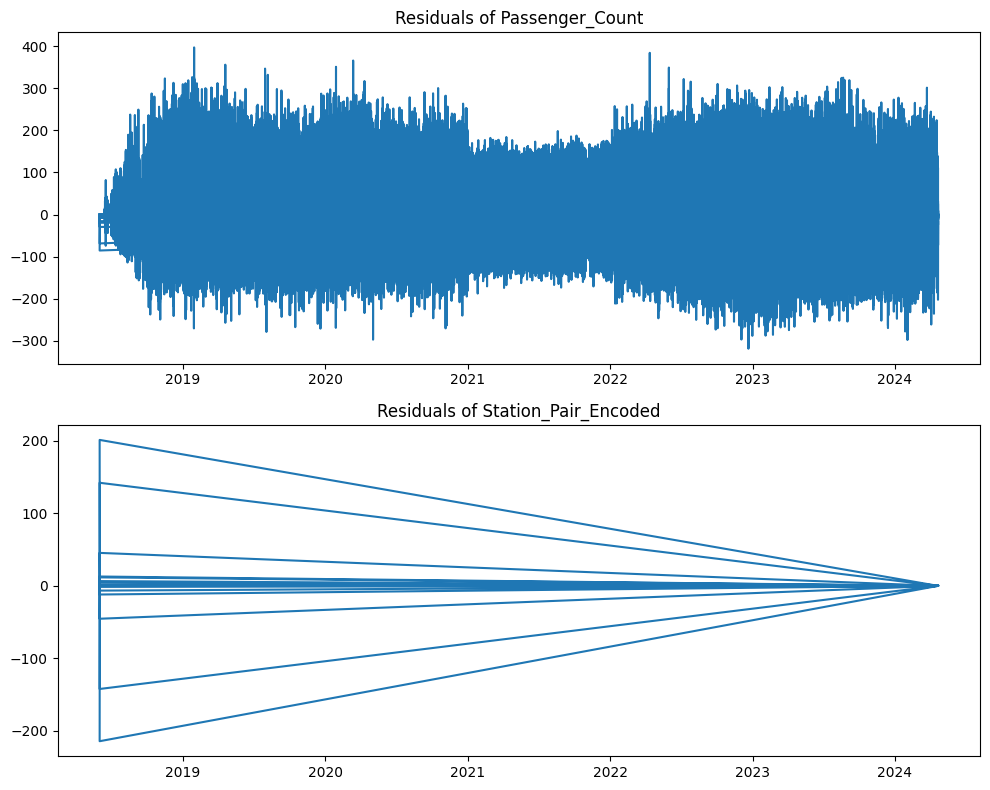

In [48]:
import matplotlib.pyplot as plt

# Plot residuals for each variable
residuals = results.resid
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

for i, col in enumerate(residuals.columns):
    axes[i].plot(residuals[col])
    axes[i].set_title(f'Residuals of {col}')

plt.tight_layout()
plt.show()


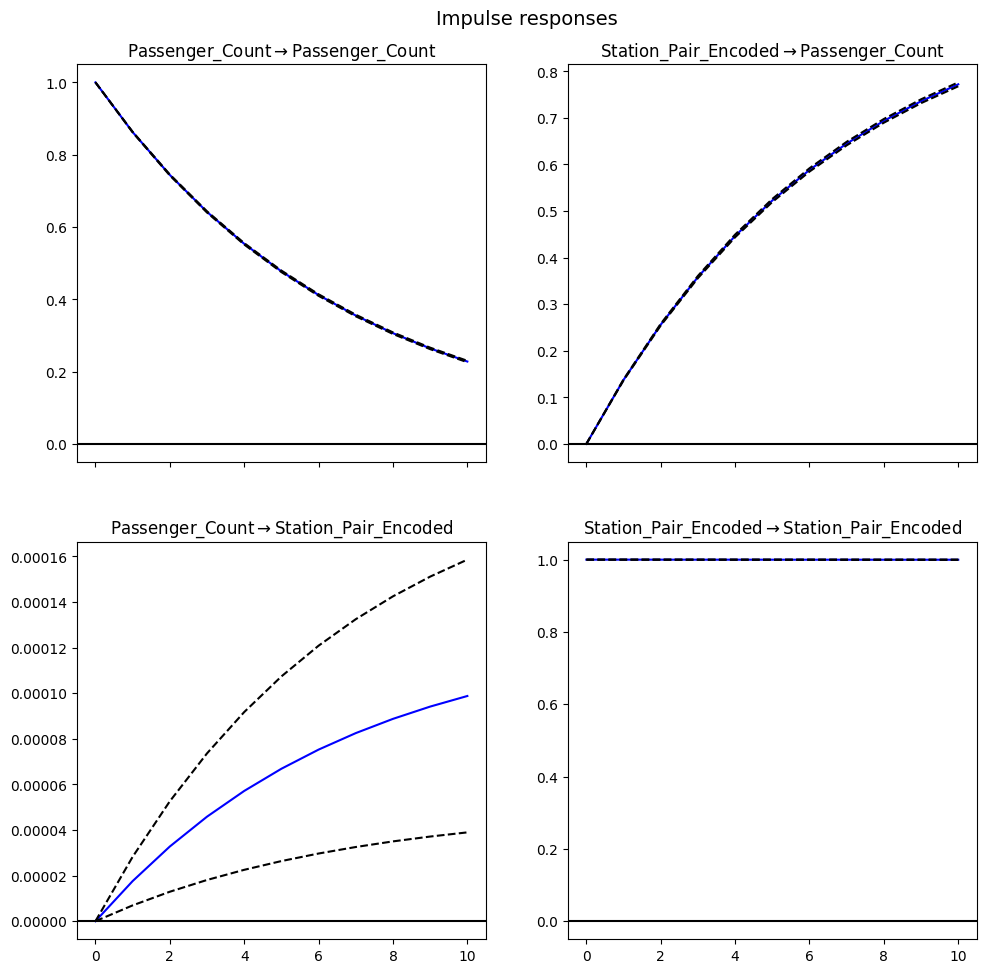

In [50]:
irf = results.irf(10)
irf.plot(orth=False)
plt.show()


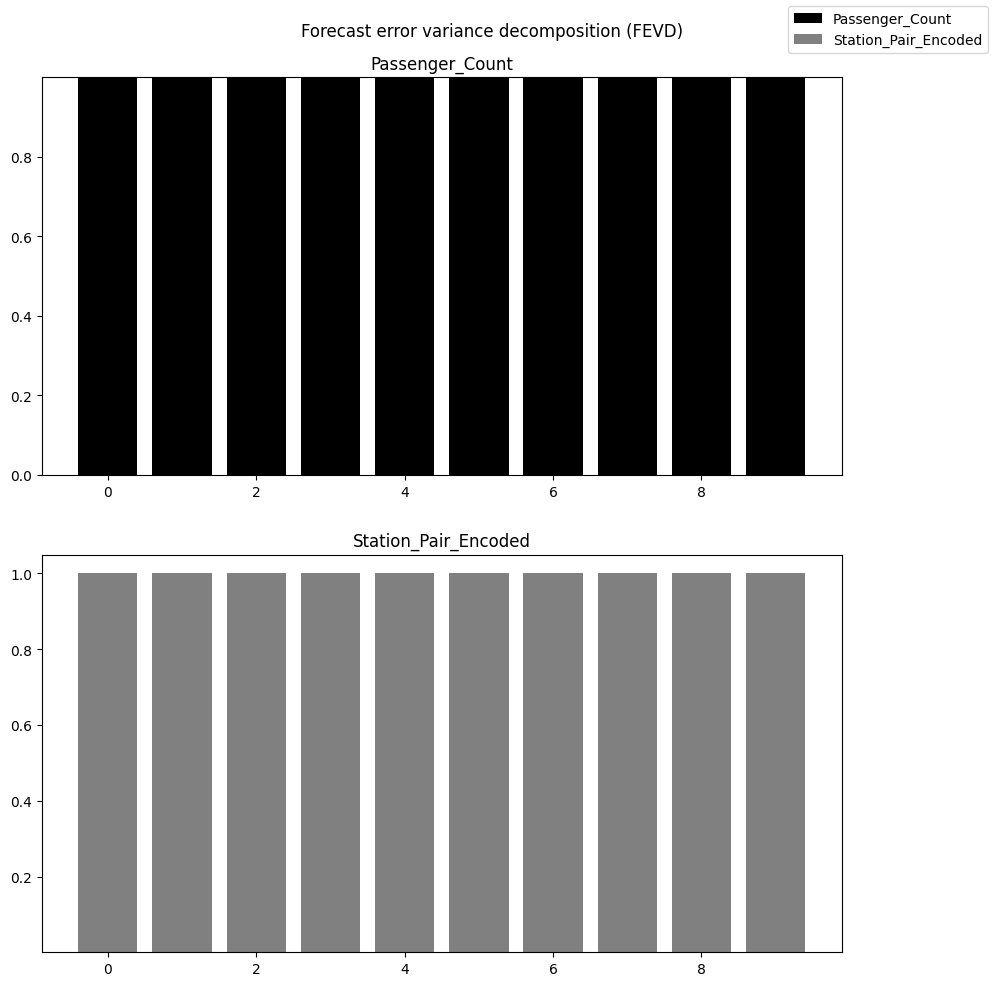

In [51]:
fevd = results.fevd(10)
fevd.plot()
plt.show()


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        14.80       14.80   2.667e+06       14.80
1        3.322       3.322       27.71       3.322
2        3.043       3.043       20.97       3.043
3        3.026       3.026       20.62       3.026
4        3.024       3.024       20.57       3.024
5        3.024       3.024       20.57       3.024
6        3.023       3.023       20.54       3.023
7        3.022       3.022       20.53       3.022
8        3.021       3.021       20.50       3.021
9        3.018       3.018       20.45       3.018
10       3.018       3.018       20.45       3.018
11       3.013       3.013       20.35       3.013
12       3.011       3.012       20.31       3.011
13       3.011       3.011       20.30       3.011
14       3.002       3.002       20.12       3.002
15      2.995*      2.995*      19.98*      2.995*
-------------------------------

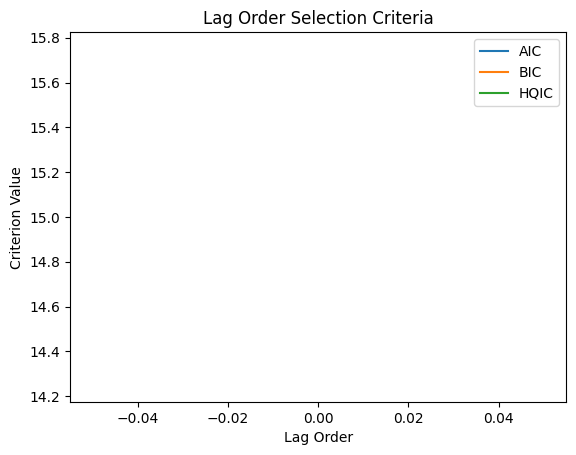

In [52]:
lag_order_results = model.select_order(maxlags=15)
print(lag_order_results.summary())

# Plot the criteria
criteria = lag_order_results.aic, lag_order_results.bic, lag_order_results.hqic

plt.plot(criteria[0], label='AIC')
plt.plot(criteria[1], label='BIC')
plt.plot(criteria[2], label='HQIC')
plt.legend()
plt.xlabel('Lag Order')
plt.ylabel('Criterion Value')
plt.title('Lag Order Selection Criteria')
plt.show()


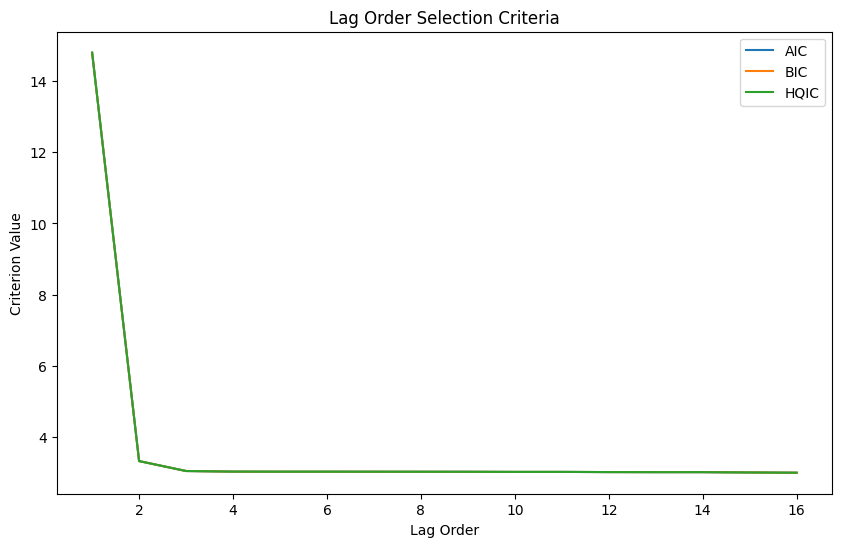

In [55]:
aic = [14.80, 3.322, 3.043, 3.026, 3.024, 3.024, 3.023, 3.022, 3.021, 3.018, 3.018, 3.013, 3.011, 3.011, 3.002, 2.995]
bic = [14.80, 3.322, 3.043, 3.026, 3.024, 3.024, 3.023, 3.022, 3.021, 3.018, 3.018, 3.013, 3.012, 3.011, 3.002, 2.995]
hqic = [14.80, 3.322, 3.043, 3.026, 3.024, 3.024, 3.023, 3.022, 3.021, 3.018, 3.018, 3.013, 3.011, 3.011, 3.002, 2.995]

# Lag order range
lags = range(1, len(aic) + 1)

plt.figure(figsize=(10, 6))
plt.plot(lags, aic, label='AIC')
plt.plot(lags, bic, label='BIC')
plt.plot(lags, hqic, label='HQIC')
plt.legend()
plt.xlabel('Lag Order')
plt.ylabel('Criterion Value')
plt.title('Lag Order Selection Criteria')
plt.show()



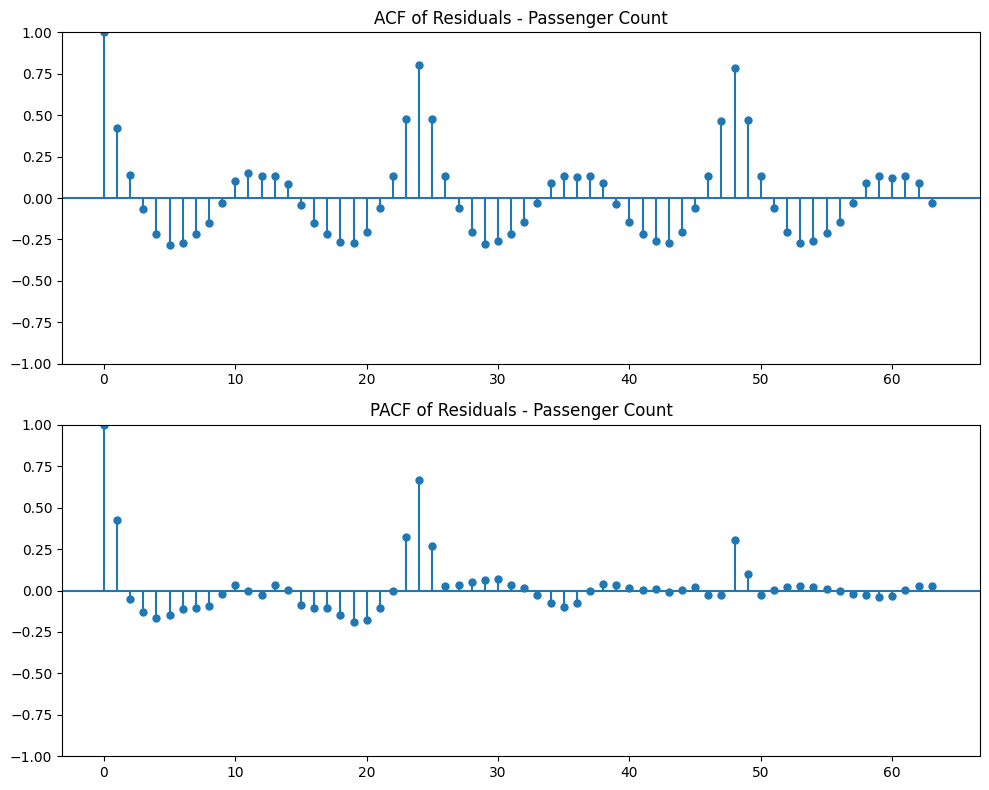

NameError: name 'true_values' is not defined

In [58]:
from statsmodels.tsa.stattools import acf, pacf
import numpy as np


residuals = results.resid
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(residuals['Passenger_Count'], ax=axes[0])
axes[0].set_title('ACF of Residuals - Passenger Count')
plot_pacf(residuals['Passenger_Count'], ax=axes[1])
axes[1].set_title('PACF of Residuals - Passenger Count')
plt.tight_layout()
plt.show()

# Performance metrics
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


mae = mean_absolute_error(true_values, predicted_values)
mse = mean_squared_error(true_values, predicted_values)
rmse = root_mean_squared_error(true_values, predicted_values)
mape = mean_absolute_percentage_error(true_values, predicted_values)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")
